In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("data_kaggle.csv")

In [5]:
data.head()

Location         Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0        NaN   
2            Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0        2.0   
3             Cheras, Kuala Lumpur           NaN   NaN        NaN        NaN   
4        Bukit Jalil, Kuala Lumpur    RM 900,000   4+1        3.0        2.0   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
3                   NaN                       NaN               NaN  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [7]:
data["Price"].tail()

53878    RM 5,100,000
53879    RM 5,000,000
53880    RM 5,500,000
53881      RM 480,000
53882      RM 540,000
Name: Price, dtype: object

In [8]:
data.isna().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [9]:
df = pd.DataFrame(data)
# Step 1: Remove 'RM' and ',' to clean numbers
df["Price"] = df["Price"].str.replace(r"[^\d.]", "", regex=True)

In [10]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
df["Price"].tail()

53878    5100000
53879    5000000
53880    5500000
53881     480000
53882     540000
Name: Price, dtype: object

In [12]:
# Convert to float and round to 2 decimal places
df["Price"] = df["Price"].astype(float).round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  float64
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.3+ MB


In [13]:
df = df[(df["Price"] >= 80000) & (df["Price"] <= 900000000)]

In [14]:
df["Price"].max()

814572000.0

In [15]:
df["Price"].min()

81000.0

In [16]:
df = df.dropna()

In [17]:
df.isna().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Size             0
Furnishing       0
dtype: int64

In [18]:
df.columns

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing'],
      dtype='object')

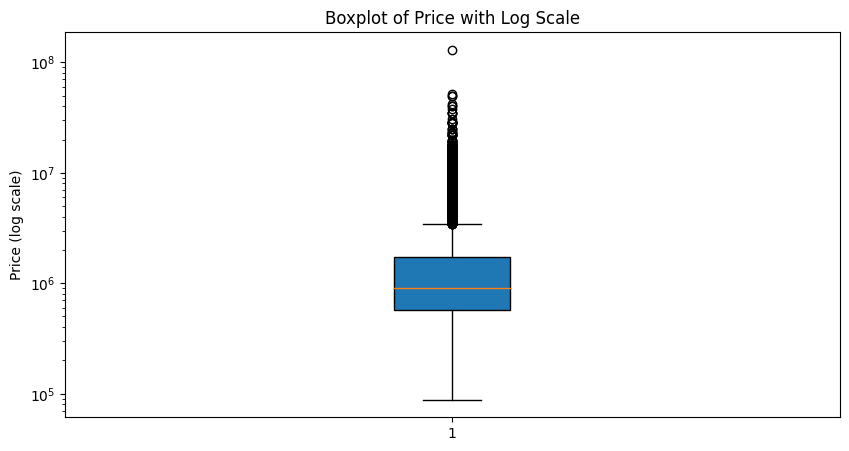

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(df["Price"], vert=True, patch_artist=True)
plt.yscale("log")  # Set logarithmic scale
plt.ylabel("Price (log scale)")
plt.title("Boxplot of Price with Log Scale")
plt.show()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31658 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       31658 non-null  object 
 1   Price          31658 non-null  float64
 2   Rooms          31658 non-null  object 
 3   Bathrooms      31658 non-null  float64
 4   Car Parks      31658 non-null  float64
 5   Property Type  31658 non-null  object 
 6   Size           31658 non-null  object 
 7   Furnishing     31658 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [21]:
df.head()

Location      Price Rooms  Bathrooms  Car Parks  \
0                 KLCC, Kuala Lumpur  1250000.0   2+1        3.0        2.0   
2              Dutamas, Kuala Lumpur  1030000.0     3        4.0        2.0   
4          Bukit Jalil, Kuala Lumpur   900000.0   4+1        3.0        2.0   
5  Taman Tun Dr Ismail, Kuala Lumpur  5350000.0   4+2        5.0        4.0   
7  Taman Tun Dr Ismail, Kuala Lumpur  2600000.0     5        4.0        4.0   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished  
5              Bungalow  Land area : 7200 sq. ft.  Partly Furnished  
7   Semi-detached House  Land area : 3600 sq. ft.  Partly Furnished

In [22]:
df["Rooms"] = df["Rooms"].astype(str).str.replace(r"[^\d+]", "", regex=True)  # Remove non-numeric characters


In [23]:
df["Rooms"].isna().sum()

0

In [24]:
# Replace empty strings with "0" to prevent errors
df["Rooms"] = df["Rooms"].replace("", "0")

In [25]:
# Remove "+" if it's at the end of the string
df["Rooms"] = df["Rooms"].str.rstrip("+")

In [26]:
print(df["Rooms"].unique())  # See all unique values


['2+1' '3' '4+1' '4+2' '5' '6+1' '3+2' '1' '3+1' '2' '6' '4' '1+1' '5+1'
 '2+2' '0' '7+1' '7' '14' '5+2' '12' '8' '8+1' '13' '20' '10' '1+2' '9'
 '10+1' '15' '9+1' '11' '13+1' '16']


In [27]:
# Convert to integer by summing split values
df["Rooms"] = df["Rooms"].apply(lambda x: sum(int(num) for num in x.split("+") if num.isdigit()))

In [28]:
df.head()
# df.info()

Location      Price  Rooms  Bathrooms  Car Parks  \
0                 KLCC, Kuala Lumpur  1250000.0      3        3.0        2.0   
2              Dutamas, Kuala Lumpur  1030000.0      3        4.0        2.0   
4          Bukit Jalil, Kuala Lumpur   900000.0      5        3.0        2.0   
5  Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6        5.0        4.0   
7  Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5        4.0        4.0   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished  
5              Bungalow  Land area : 7200 sq. ft.  Partly Furnished  
7   Semi-detached House  Land area : 3600 sq. ft.  Partly Furnished

In [29]:
df["Bathrooms"] = df["Bathrooms"].astype("int64")
df["Car Parks"] = df["Car Parks"].astype("int64")

In [30]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [31]:
dfbefore = df.copy()

In [32]:
property_category_mapping = {
    # Flats
    "Flat": "Flat",
    "Flat (Intermediate)": "Flat",
    "Flat (Corner)": "Flat",
    "Flat (EndLot)": "Flat",

    # Apartments & Condominiums
    "Apartment": "Apartment",
    "Apartment (Intermediate)": "Apartment",
    "Apartment (Corner)": "Apartment",
    "Apartment (EndLot)": "Apartment",
    "Apartment (Penthouse)": "Apartment",
    "Apartment (Duplex)": "Apartment",
    "Apartment (Studio)": "Apartment",
    "Apartment (Triplex)": "Apartment",

    "Condominium": "Condominium",
    "Condominium (Intermediate)": "Condominium",
    "Condominium (EndLot)": "Condominium",
    "Condominium (Corner)": "Condominium",
    "Condominium (Penthouse)": "Condominium",
    "Condominium (SOHO)": "Condominium",
    "Condominium (Duplex)": "Condominium",
    "Condominium (Triplex)": "Condominium",
    "Condominium (Studio)": "Condominium",

    "Serviced Residence": "Condominium",
    "Serviced Residence (Intermediate)": "Condominium",
    "Serviced Residence (EndLot)": "Condominium",
    "Serviced Residence (Corner)": "Condominium",
    "Serviced Residence (Penthouse)": "Condominium",
    "Serviced Residence (Duplex)": "Condominium",
    "Serviced Residence (SOHO)": "Condominium",
    "Serviced Residence (Triplex)": "Condominium",
    "Serviced Residence (Studio)": "Condominium",

    # Townhouses
    "Townhouse": "Townhouse",
    "Townhouse (Intermediate)": "Townhouse",
    "Townhouse (EndLot)": "Townhouse",
    "Townhouse (Corner)": "Townhouse",
    "Townhouse (Duplex)": "Townhouse",

    # Terrace/Link Houses
    "1-sty Terrace/Link House": "Landed",
    "1-sty Terrace/Link House (Intermediate)": "Landed",
    "1-sty Terrace/Link House (Corner)": "Landed",
    "1-sty Terrace/Link House (EndLot)": "Landed",
    "1.5-sty Terrace/Link House": "Landed",
    "1.5-sty Terrace/Link House (Intermediate)": "Landed",
    "1.5-sty Terrace/Link House (Corner)": "Landed",
    "1.5-sty Terrace/Link House (EndLot)": "Landed",
    "2-sty Terrace/Link House": "Landed",
    "2-sty Terrace/Link House (Intermediate)": "Landed",
    "2-sty Terrace/Link House (Corner)": "Landed",
    "2-sty Terrace/Link House (EndLot)": "Landed",
    "2-sty Terrace/Link House (Duplex)": "Landed",
    "2-sty Terrace/Link House (Penthouse)": "Landed",
    "2.5-sty Terrace/Link House": "Landed",
    "2.5-sty Terrace/Link House (Intermediate)": "Landed",
    "2.5-sty Terrace/Link House (Corner)": "Landed",
    "2.5-sty Terrace/Link House (EndLot)": "Landed",
    "2.5-sty Terrace/Link House (Triplex)": "Landed",
    "2.5-sty Terrace/Link House (Duplex)": "Landed",
    "3-sty Terrace/Link House": "Landed",
    "3-sty Terrace/Link House (Intermediate)": "Landed",
    "3-sty Terrace/Link House (Corner)": "Landed",
    "3-sty Terrace/Link House (EndLot)": "Landed",
    "3-sty Terrace/Link House (Duplex)": "Landed",
    "3-sty Terrace/Link House (Triplex)": "Landed",
    "3.5-sty Terrace/Link House": "Landed",
    "3.5-sty Terrace/Link House (Intermediate)": "Landed",
    "3.5-sty Terrace/Link House (Corner)": "Landed",
    "3.5-sty Terrace/Link House (EndLot)": "Landed",
    "4-sty Terrace/Link House": "Landed",
    "4-sty Terrace/Link House (Intermediate)": "Landed",
    "4-sty Terrace/Link House (Corner)": "Landed",
    "4-sty Terrace/Link House (Penthouse)": "Landed",
    "4.5-sty Terrace/Link House": "Landed",
    "4.5-sty Terrace/Link House (Intermediate)": "Landed",
    "4.5-sty Terrace/Link House (Corner)": "Landed",

    # Semi-Detached Houses
    "Semi-detached House": "Landed",
    "Semi-detached House (Intermediate)": "Landed",
    "Semi-detached House (Corner)": "Landed",
    "Semi-detached House (EndLot)": "Landed",
    "Semi-detached House (Triplex)": "Landed",
    "Semi-detached House (Duplex)": "Landed",
    "Semi-detached House (SOHO)": "Landed",

    # Bungalows
    "Bungalow": "Luxury",
    "Bungalow (Intermediate)": "Luxury",
    "Bungalow (Corner)": "Luxury",
    "Bungalow (EndLot)": "Luxury",

    # Cluster Houses
    "Cluster House": "Landed",
    "Cluster House (Intermediate)": "Landed",

    # Land
    "Bungalow Land": "Vacant Land & Plots",
    "Bungalow Land (Intermediate)": "Vacant Land & Plots",
    "Bungalow Land (Corner)": "Vacant Land & Plots",
    "Residential Land": "Vacant Land & Plots",
    "Residential Land (Intermediate)": "Vacant Land & Plots",
    "Residential Land (Corner)": "Vacant Land & Plots",
}

df["Property Type"] = df["Property Type"].map(property_category_mapping).fillna("Others")

In [33]:
df1 = df.copy()

In [34]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [35]:
import re

# Function to clean and convert sizes
def convert_size(value):
    value = str(value).lower().strip()

    # Handle missing values
    if "unknown" in value or "n/a" in value or "nil" in value or "malaysia" in value:
        return None

    # Extract only numbers, properly handling commas
    match = re.search(r"([\d,]+)\s*(sq\. ft\.|acres|sq\. m\.|hectare|x|\-)?", value)
    if not match:
        return None

    num = match.group(1).replace(",", "")  # Remove commas
    unit = match.group(2) if match.group(2) else "sq. ft."

    try:
        num = float(num)  # Convert to float
    except ValueError:
        return None

    # Ensure no accidental unit conversion
    if "sq. ft." in value:
        return int(num)  # Keep as is
    elif "acres" in value:
        return int(num * 43560)  # Convert acres to sq. ft.
    elif "sq. m." in value:
        return int(num * 10.764)  # Convert square meters to sq. ft.
    elif "hectare" in value:
        return int(num * 107639)  # Convert hectares to sq. ft.
    else:
        return int(num)  # Default case

# Apply the function
df1["Size (sq. ft.)"] = df1["Size"].apply(convert_size)

# Display result
print(df1)



                                Location      Price  Rooms  Bathrooms  \
0                     KLCC, Kuala Lumpur  1250000.0      3          3   
2                  Dutamas, Kuala Lumpur  1030000.0      3          4   
4              Bukit Jalil, Kuala Lumpur   900000.0      5          3   
5      Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6          5   
7      Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5          4   
...                                  ...        ...    ...        ...   
53862              Seputeh, Kuala Lumpur   750000.0      3          2   
53868           KL Sentral, Kuala Lumpur  1400000.0      4          3   
53869          KL Eco City, Kuala Lumpur   880000.0      1          1   
53876         Sri Hartamas, Kuala Lumpur  2700000.0      6          6   
53882              Setapak, Kuala Lumpur   540000.0      4          2   

       Car Parks Property Type                      Size        Furnishing  \
0              2   Condominium  Built-up : 1,

In [36]:
df1.head()

Location      Price  Rooms  Bathrooms  Car Parks  \
0                 KLCC, Kuala Lumpur  1250000.0      3          3          2   
2              Dutamas, Kuala Lumpur  1030000.0      3          4          2   
4          Bukit Jalil, Kuala Lumpur   900000.0      5          3          2   
5  Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6          5          4   
7  Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5          4          4   

  Property Type                      Size        Furnishing  Size (sq. ft.)  
0   Condominium  Built-up : 1,335 sq. ft.   Fully Furnished          1335.0  
2   Condominium  Built-up : 1,875 sq. ft.  Partly Furnished          1875.0  
4   Condominium  Built-up : 1,513 sq. ft.  Partly Furnished          1513.0  
5        Luxury  Land area : 7200 sq. ft.  Partly Furnished          7200.0  
7        Landed  Land area : 3600 sq. ft.  Partly Furnished          3600.0

In [37]:
df1.isna().sum()

Location           0
Price              0
Rooms              0
Bathrooms          0
Car Parks          0
Property Type      0
Size               0
Furnishing         0
Size (sq. ft.)    39
dtype: int64

In [38]:
df1.dropna()

Location      Price  Rooms  Bathrooms  \
0                     KLCC, Kuala Lumpur  1250000.0      3          3   
2                  Dutamas, Kuala Lumpur  1030000.0      3          4   
4              Bukit Jalil, Kuala Lumpur   900000.0      5          3   
5      Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6          5   
7      Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5          4   
...                                  ...        ...    ...        ...   
53862              Seputeh, Kuala Lumpur   750000.0      3          2   
53868           KL Sentral, Kuala Lumpur  1400000.0      4          3   
53869          KL Eco City, Kuala Lumpur   880000.0      1          1   
53876         Sri Hartamas, Kuala Lumpur  2700000.0      6          6   
53882              Setapak, Kuala Lumpur   540000.0      4          2   

       Car Parks Property Type                      Size        Furnishing  \
0              2   Condominium  Built-up : 1,335 sq. ft.   Fully Furnished   
2              2   Condominium  Built-up : 1,875 sq. ft.  Partly Furnished   
4              2   Condominium  Built-up : 1,513 sq. ft.  Partly Furnished   
5              4        Luxury  Land area : 7200 sq. ft.  Partly Furnished   
7              4        Landed  Land area : 3600 sq. ft.  Partly Furnished   
...          ...           ...                       ...               ...   
53862          1   Condominium    Built-up : 915 sq. ft.  Partly Furnished   
53868          2   Condominium  Land area : 1544 sq. ft.   Fully Furnished   
53869          1   Condominium    Built-up : 650 sq. ft.  Partly Furnished   
53876          3   Condominium  Built-up : 3,973 sq. ft.  Partly Furnished   
53882          3   Condominium  Built-up : 1,313 sq. ft.  Partly Furnished   

       Size (sq. ft.)  
0              1335.0  
2              1875.0  
4              1513.0  
5              7200.0  
7              3600.0  
...               ...  
53862           915.0  
53868          1544.0  
53869           650.0  
53876          3973.0  
53882          1313.0  

[31619 rows x 9 columns]

In [39]:
print(df1[df1["Size (sq. ft.)"].isna()])

                                              Location      Price  Rooms  \
3400                          Mont Kiara, Kuala Lumpur  2650000.0      5   
8846                              Kepong, Kuala Lumpur   520000.0      3   
11368                         Mont Kiara, Kuala Lumpur   750000.0      3   
11371                         Mont Kiara, Kuala Lumpur   850000.0      4   
11374                         Mont Kiara, Kuala Lumpur  1890000.0      5   
11375                      Desa ParkCity, Kuala Lumpur  1600000.0      3   
11576                        Wangsa Maju, Kuala Lumpur   510000.0      4   
11849  Jalan Klang Lama (Old Klang Road), Kuala Lumpur   550000.0      1   
11850  Jalan Klang Lama (Old Klang Road), Kuala Lumpur   680000.0      2   
14121                      Jalan Kuching, Kuala Lumpur   395000.0      3   
15391                         Batu Caves, Kuala Lumpur  1100000.0      5   
16462                      Salak Selatan, Kuala Lumpur   550000.0      3   
19861       

In [40]:
df1 = df1.dropna(subset=["Size (sq. ft.)"])

In [41]:
df1.isna().sum()

Location          0
Price             0
Rooms             0
Bathrooms         0
Car Parks         0
Property Type     0
Size              0
Furnishing        0
Size (sq. ft.)    0
dtype: int64

In [42]:
del df1["Size"]

In [43]:
df1.head()

Location      Price  Rooms  Bathrooms  Car Parks  \
0                 KLCC, Kuala Lumpur  1250000.0      3          3          2   
2              Dutamas, Kuala Lumpur  1030000.0      3          4          2   
4          Bukit Jalil, Kuala Lumpur   900000.0      5          3          2   
5  Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6          5          4   
7  Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5          4          4   

  Property Type        Furnishing  Size (sq. ft.)  
0   Condominium   Fully Furnished          1335.0  
2   Condominium  Partly Furnished          1875.0  
4   Condominium  Partly Furnished          1513.0  
5        Luxury  Partly Furnished          7200.0  
7        Landed  Partly Furnished          3600.0

In [44]:
df1 = df1[~df1["Furnishing"].str.contains("unknown", case=False, na=False)]

In [45]:
df1["Furnishing"].unique()

array(['Fully Furnished', 'Partly Furnished', 'Unfurnished'], dtype=object)

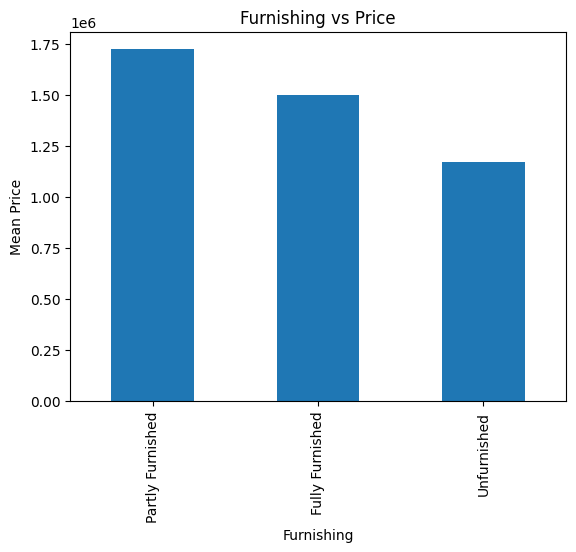

In [46]:
df1.groupby("Furnishing")["Price"].mean().sort_values(ascending=False).plot(kind= "bar")
plt.title("Furnishing vs Price")
plt.ylabel("Mean Price")
plt.show()

In [47]:
df1.columns

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Furnishing', 'Size (sq. ft.)'],
      dtype='object')

In [48]:
df1.head()

Location      Price  Rooms  Bathrooms  Car Parks  \
0                 KLCC, Kuala Lumpur  1250000.0      3          3          2   
2              Dutamas, Kuala Lumpur  1030000.0      3          4          2   
4          Bukit Jalil, Kuala Lumpur   900000.0      5          3          2   
5  Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6          5          4   
7  Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5          4          4   

  Property Type        Furnishing  Size (sq. ft.)  
0   Condominium   Fully Furnished          1335.0  
2   Condominium  Partly Furnished          1875.0  
4   Condominium  Partly Furnished          1513.0  
5        Luxury  Partly Furnished          7200.0  
7        Landed  Partly Furnished          3600.0

In [50]:
# Remove extreme values in 'Price'
df1 = df1[df1["Price"] < df1["Price"].quantile(0.99)]  
df1 = df1[df1["Price"] > df1["Price"].quantile(0.01)]  

In [54]:
import numpy as np

df1["Price_per_sqft"] = df1["Price"] / df1["Size (sq. ft.)"]
df1["Price_per_sqft"].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
df1.dropna(subset=["Price_per_sqft"], inplace=True)  # Drop rows with NaN in this column


In [55]:
# Step 1: Combine Property Type and Furnishing
df1["PropertyType_Furnishing"] = df1["Property Type"].astype(str) + "_" + df1["Furnishing"]

# Step 2: Apply Frequency Encoding
freq_map = df1["PropertyType_Furnishing"].value_counts().to_dict()  # Create dictionary
df1["PropertyType_Furnishing"] = df1["PropertyType_Furnishing"].map(freq_map)  # Map values

In [56]:
df1.head()

Location      Price  Rooms  Bathrooms  Car Parks  \
0                 KLCC, Kuala Lumpur  1250000.0      3          3          2   
2              Dutamas, Kuala Lumpur  1030000.0      3          4          2   
4          Bukit Jalil, Kuala Lumpur   900000.0      5          3          2   
5  Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6          5          4   
7  Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5          4          4   

  Property Type        Furnishing  Size (sq. ft.)  Price_per_sqft  \
0   Condominium   Fully Furnished          1335.0      936.329588   
2   Condominium  Partly Furnished          1875.0      549.333333   
4   Condominium  Partly Furnished          1513.0      594.844679   
5        Luxury  Partly Furnished          7200.0      743.055556   
7        Landed  Partly Furnished          3600.0      722.222222   

   PropertyType_Furnishing  
0                     8694  
2                    12911  
4                    12911  
5                      843  
7                     2861

In [57]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Property Type'
label_encoder = LabelEncoder()
df1['Property Type'] = label_encoder.fit_transform(df1['Property Type'])

# One-Hot Encoding for 'Furnishing'
df1 = pd.get_dummies(df1, columns=['Furnishing'], drop_first=False)


# Display first few rows in a readable format
print("\n===== Encoded Data (Formatted) =====")
print(df1.to_string(index=False))  # Print without index


===== Encoded Data (Formatted) =====
                                       Location      Price  Rooms  Bathrooms  Car Parks  Property Type  Size (sq. ft.)  Price_per_sqft  PropertyType_Furnishing  Furnishing_Fully Furnished  Furnishing_Partly Furnished  Furnishing_Unfurnished
                             KLCC, Kuala Lumpur  1250000.0      3          3          2              1          1335.0    9.363296e+02                     8694                           1                            0                       0
                          Dutamas, Kuala Lumpur  1030000.0      3          4          2              1          1875.0    5.493333e+02                    12911                           0                            1                       0
                      Bukit Jalil, Kuala Lumpur   900000.0      5          3          2              1          1513.0    5.948447e+02                    12911                           0                            1                       

In [58]:
df1["Price_per_sqft"] = np.log1p(df1["Price_per_sqft"])

LINEAR REGRESSION

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Select Features (Ensure they are numerical)
features = ["Rooms", "Bathrooms", "Car Parks", "Property Type", "Size (sq. ft.)", "Price_per_sqft","PropertyType_Furnishing"]  # Include "Building_Age" if available

X = df1[features]
y = df1["Price"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Train Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

MAE: 649051.85
MAPE: 55.36%
R² Score: 0.5167


RANDOM FOREST REGRESSOR

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Min samples needed to split a node
    'min_samples_leaf': [1, 2, 4],     # Min samples per leaf node
    'max_features': ['sqrt', 'log2']   # Number of features to consider at each split
}

In [63]:
rf = RandomForestRegressor(random_state=42)

In [64]:
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5,         # 5-fold cross-validation
    scoring='neg_mean_absolute_error', # Minimize MAE
    n_jobs=-1,    # Use all CPU cores
    verbose=2     # Show progress
)


In [65]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [66]:
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_  # Best RandomForest model


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [67]:
y_pred = best_rf.predict(X_test)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

MAE: 50510.04
MAPE: 2.74%
R² Score: 0.9848


In [316]:
df1.head()

Location      Price  Rooms  Bathrooms  Car Parks  \
0                 KLCC, Kuala Lumpur  1250000.0      3          3          2   
2              Dutamas, Kuala Lumpur  1030000.0      3          4          2   
4          Bukit Jalil, Kuala Lumpur   900000.0      5          3          2   
5  Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6          5          4   
7  Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5          4          4   

   Property Type  Size (sq. ft.)  Price_per_sqft  PropertyType_Furnishing  \
0             76          1335.0        6.843035                     1869   
2             55          1875.0        6.310524                     2599   
4             55          1513.0        6.389980                     2599   
5             45          7200.0        6.612116                      264   
7             69          3600.0        6.583717                      152   

   Furnishing_Fully Furnished  Furnishing_Partly Furnished  \
0                           1                            0   
2                           0                            1   
4                           0                            1   
5                           0                            1   
7                           0                            1   

   Furnishing_Unfurnished  
0                       0  
2                       0  
4                       0  
5                       0  
7                       0

In [317]:
df.head()

Location      Price  Rooms  Bathrooms  Car Parks  \
0                 KLCC, Kuala Lumpur  1250000.0      3          3          2   
2              Dutamas, Kuala Lumpur  1030000.0      3          4          2   
4          Bukit Jalil, Kuala Lumpur   900000.0      5          3          2   
5  Taman Tun Dr Ismail, Kuala Lumpur  5350000.0      6          5          4   
7  Taman Tun Dr Ismail, Kuala Lumpur  2600000.0      5          4          4   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished  
5              Bungalow  Land area : 7200 sq. ft.  Partly Furnished  
7   Semi-detached House  Land area : 3600 sq. ft.  Partly Furnished

In [69]:
df1.to_csv("cleaned_data.csv", index=False)

In [70]:
df.to_csv("original_data.csv", index=False)

Other Model


In [71]:
grid_search_rfr = grid_search
grid_search_rfr

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [72]:
import joblib

joblib.dump(grid_search_rfr,"model.pkl")


['model.pkl']

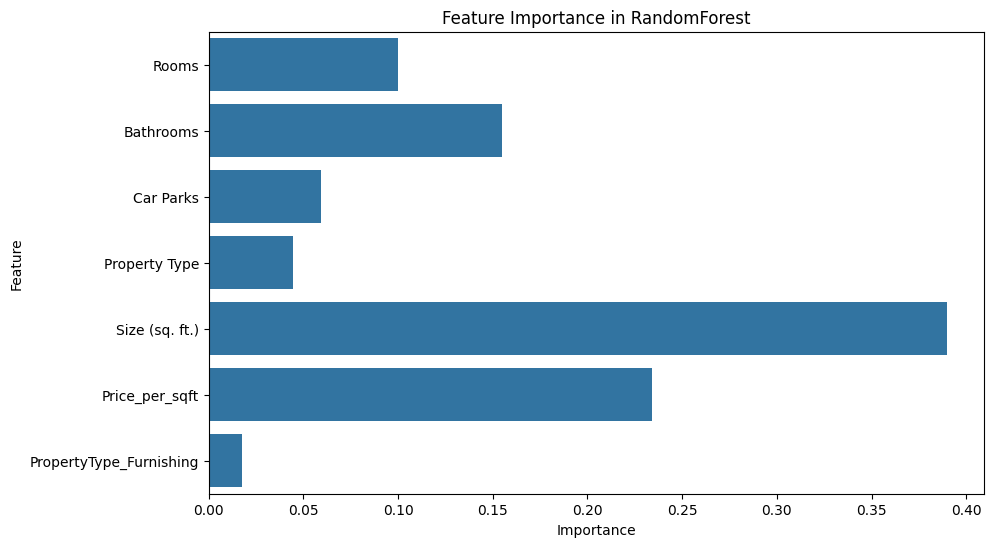

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in RandomForest")
plt.show()


In [74]:
avg_price_by_type = df.groupby("Property Type")["Price"].mean().sort_values()
print(avg_price_by_type)


Property Type
Flat                   2.332211e+05
Apartment              4.026940e+05
Townhouse              9.678033e+05
Condominium            1.289016e+06
Landed                 1.727909e+06
Luxury                 7.239288e+06
Vacant Land & Plots    1.127367e+07
Name: Price, dtype: float64


In [75]:
avg_price_per_sqft = df1.groupby("Property Type")["Price_per_sqft"].mean().sort_values()
print(avg_price_per_sqft)

Property Type
2    5.970493
0    6.028417
1    6.573708
6    6.719312
4    6.783109
5    6.931126
3    8.962446
Name: Price_per_sqft, dtype: float64


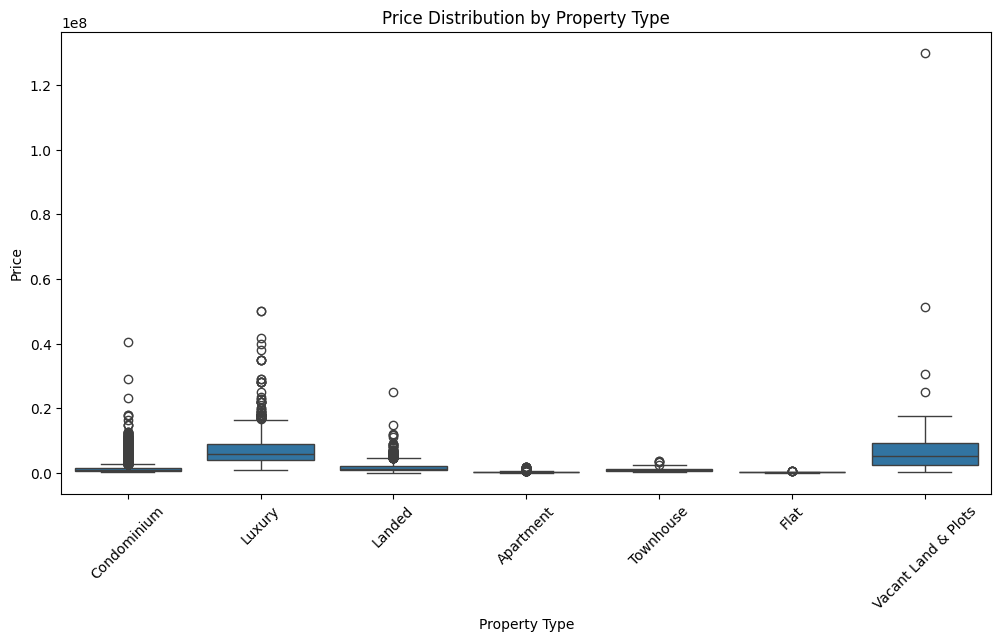

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="Property Type", y="Price", data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Property Type")
plt.show()


In [77]:
df.groupby(["Location", "Property Type"])["Price"].mean().sort_values()


Location                                         Property Type      
Batu Caves, Kuala Lumpur                         Flat                       88000.0
Desa Petaling, Kuala Lumpur                      Flat                      150200.0
Sungai Besi, Kuala Lumpur                        Flat                      151500.0
Setiawangsa, Kuala Lumpur                        Flat                      176000.0
KL City, Kuala Lumpur                            Flat                      180000.0
                                                                           ...     
Brickfields, Kuala Lumpur                        Vacant Land & Plots     17690000.0
Ampang Hilir, Kuala Lumpur                       Vacant Land & Plots     20667500.0
Brickfields, Kuala Lumpur                        Luxury                  22745500.0
Jalan Klang Lama (Old Klang Road), Kuala Lumpur  Vacant Land & Plots     26380505.0
Pantai, Kuala Lumpur                             Vacant Land & Plots    130000000.0
Name: P

In [78]:
df1.groupby("Property Type")["Price_per_sqft"].mean().sort_values()

Property Type
2    5.970493
0    6.028417
1    6.573708
6    6.719312
4    6.783109
5    6.931126
3    8.962446
Name: Price_per_sqft, dtype: float64

In [79]:
avg_price_by_type_furnishing = df.groupby(["Property Type", "Furnishing"])["Price"].mean().unstack()
print(avg_price_by_type_furnishing)

Furnishing           Fully Furnished  Partly Furnished   Unfurnished  \
Property Type                                                          
Apartment               5.008165e+05      3.970624e+05  3.356757e+05   
Condominium             1.307105e+06      1.361622e+06  8.649960e+05   
Flat                    2.240000e+05      2.512222e+05  2.069091e+05   
Landed                  2.067464e+06      1.773750e+06  1.341317e+06   
Luxury                  8.753604e+06      7.316598e+06  5.037751e+06   
Townhouse               1.125048e+06      9.576672e+05  8.501178e+05   
Vacant Land & Plots     5.463833e+06      9.003182e+06  8.789244e+06   

Furnishing                Unknown  
Property Type                      
Apartment            4.765714e+05  
Condominium          1.137697e+06  
Flat                 1.920000e+05  
Landed               1.046732e+06  
Luxury               9.108571e+06  
Townhouse            5.712500e+05  
Vacant Land & Plots  4.612500e+07  


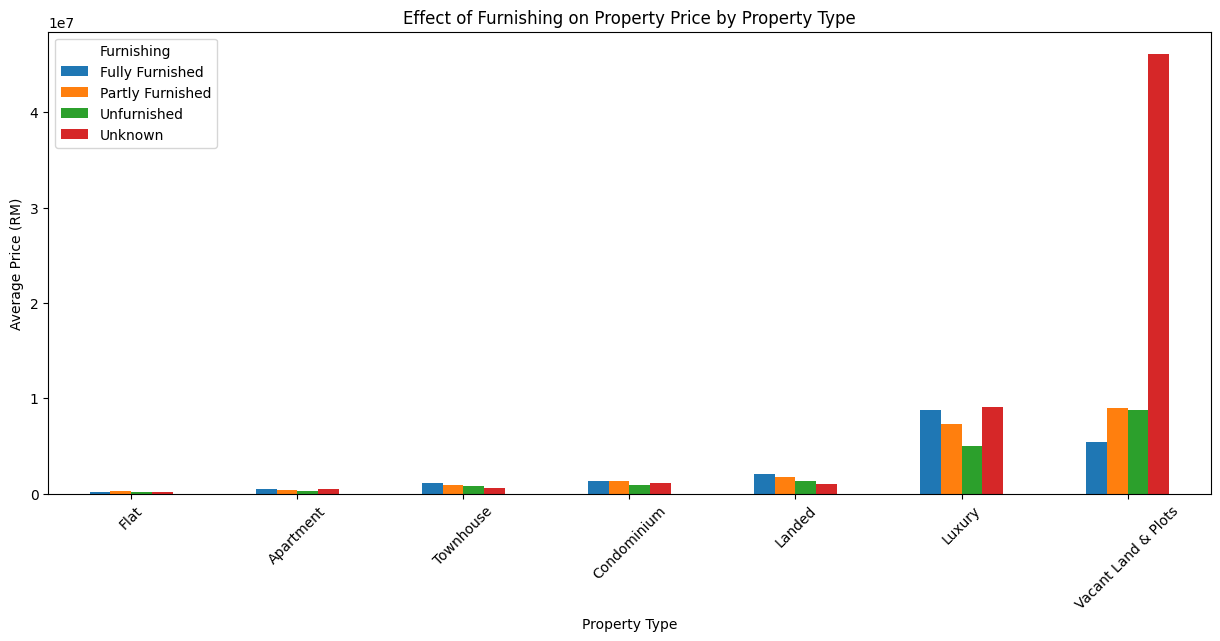

In [80]:
import matplotlib.pyplot as plt

# Sorting property types by average price for better visualization
sorted_types = df.groupby("Property Type")["Price"].mean().sort_values().index

# Plot
avg_price_by_type_furnishing.loc[sorted_types].plot(kind="bar", figsize=(15,6))
plt.xlabel("Property Type")
plt.ylabel("Average Price (RM)")
plt.title("Effect of Furnishing on Property Price by Property Type")
plt.xticks(rotation=45)
plt.legend(title="Furnishing")
plt.show()


In [81]:
df["Property Type"].unique().sum()


'CondominiumLuxuryLandedApartmentTownhouseFlatVacant Land & Plots'

In [343]:
avg_price_by_category = df.groupby("Property Category")["Price"].mean()
print(avg_price_by_category)


Property Category
Apartment              4.026940e+05
Condominium            1.289016e+06
Flat                   2.332211e+05
Landed                 1.727909e+06
Luxury                 7.239288e+06
Townhouse              9.678033e+05
Vacant Land & Plots    1.127367e+07
Name: Price, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2600\1194139487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette="viridis")


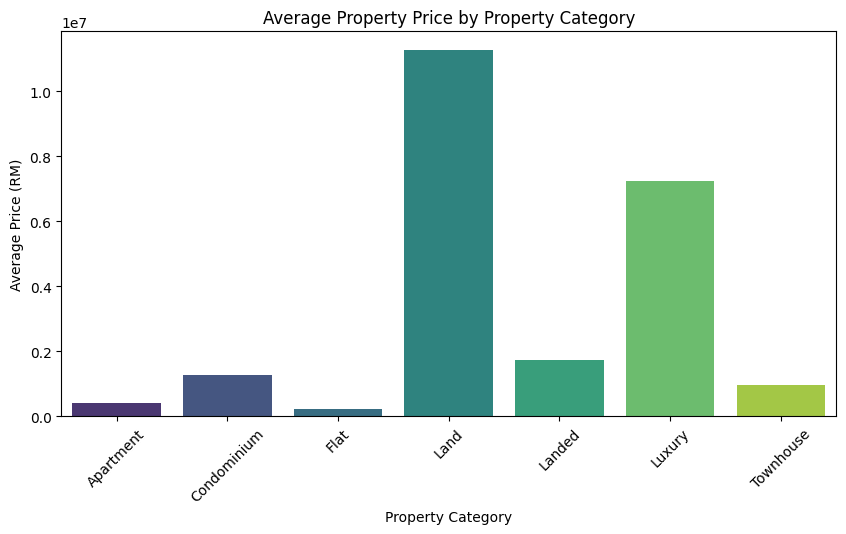

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette="viridis")
plt.title("Average Property Price by Property Category")
plt.xlabel("Property Category")
plt.ylabel("Average Price (RM)")
plt.xticks(rotation=45)
plt.show()


In [1]:
df.to_csv("cleaned_data.csv", index=False)

NameError: name 'df' is not defined

In [329]:
import matplotlib.pyplot as plt

feature_importance = grid_search_rfr.feature_importances_
features = grid_search_rfr.feature_names_in_

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance of RandomForestRegressor")
plt.show()


AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'